In [1]:
##### Decoding of stimulus identity (time-course)

import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import import_ipynb
import func_analysis
import func_format

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from scipy import stats


importing Jupyter notebook from func_analysis.ipynb
importing Jupyter notebook from func_format.ipynb


In [2]:
resultsall = np.zeros(7)
allstartpredicted = np.zeros(300)
allstoppredicted = np.zeros(300)
allstartactual = np.zeros(300)
allstopactual = np.zeros(300)

resultsfiles = ['F:/Figure3_New/LDAovertime/Amygdala6_LDAresults_persecond_responsiveonly.csv',
               'F:/Figure3_New/LDAovertime/Amygdala8_LDAresults_persecond_responsiveonly.csv',
               'F:/Figure3_New/LDAovertime/Amygdala10_LDAresults_persecond_responsiveonly.csv',
               'F:/Figure3_New/LDAovertime/Amygdala11_LDAresults_persecond_responsiveonly.csv']
ratID = ['Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11']
date = ['13042019', '01102019', '27062020', '06072020']

for f, file in enumerate(resultsfiles):
    
    Aresults = np.loadtxt(file, delimiter = ',', dtype = str)


    for i, inte in enumerate(np.unique(Aresults[:,-2])):
        
        intresults = Aresults[Aresults[:,-2] == inte]
        
        before = Aresults[np.where((Aresults[:,-2] == inte) & (Aresults[:,3] == 'before'))]
        during = Aresults[np.where((Aresults[:,-2] == inte) & (Aresults[:,3] == 'during'))]
        after = Aresults[np.where((Aresults[:,-2] == inte) & (Aresults[:,3] == 'after'))]

        beforepredicted = np.array(before[:,2], float)
        beforeactual = np.array(before[:,4], float)

        duringpredicted = np.array(during[:,2], float)
        duringactual = np.array(during[:,4], float)

        afterpredicted = np.array(after[:,2], float)
        afteractual = np.array(after[:,4], float)
        
        start = intresults[:300]
        stop = intresults[-300:]
        
        predictedstart = np.array(start[:,2], np.float)
        actualstart = np.array(start[:,4], np.float)
        
        predictedstop = np.array(stop[:,2], np.float)
        actualstop = np.array(stop[:,4], np.float)
        
        allstartpredicted = np.vstack((allstartpredicted, predictedstart))
        allstartactual = np.vstack((allstartactual, actualstart))
        
        allstoppredicted = np.vstack((allstoppredicted, predictedstop))
        allstopactual = np.vstack((allstopactual, actualstop))
        
        
        results = np.hstack((inte, ratID[f], date[f], intresults[0][-1], metrics.balanced_accuracy_score(beforeactual, beforepredicted), metrics.balanced_accuracy_score(duringactual, duringpredicted), metrics.balanced_accuracy_score(afteractual, afterpredicted)))

        resultsall = np.vstack((resultsall, results))
        #print(duringpredicted.shape)
        
        
resultsall = resultsall[1:]
allstartpredicted = allstartpredicted[1:]
allstartactual = allstartactual[1:]
allstoppredicted = allstoppredicted[1:]
allstopactual = allstopactual[1:]

    
    
    

C:\Users\Cristina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [3]:
A6actualstart = allstartactual[resultsall[:,1] == 'Amygdala6'].T
A6predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala6'].T

A6actualstop = allstopactual[resultsall[:,1] == 'Amygdala6'].T
A6predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala6'].T

A8actualstart = allstartactual[resultsall[:,1] == 'Amygdala8'].T
A8predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala8'].T

A8actualstop = allstopactual[resultsall[:,1] == 'Amygdala8'].T
A8predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala8'].T

A10actualstart = allstartactual[resultsall[:,1] == 'Amygdala10'].T
A10predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala10'].T

A10actualstop = allstopactual[resultsall[:,1] == 'Amygdala10'].T
A10predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala10'].T

A11actualstart = allstartactual[resultsall[:,1] == 'Amygdala11'].T
A11predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala11'].T

A11actualstop = allstopactual[resultsall[:,1] == 'Amygdala11'].T
A11predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala11'].T


In [4]:
A6balancedaccuracystart = []
A6balancedaccuracystop = []
for x, row in enumerate(A6actualstart):
    
    A6balancedaccuracystart = np.append(A6balancedaccuracystart, metrics.balanced_accuracy_score(row, A6predictedstart[x]))
    
for x, row in enumerate(A6actualstop):
    
    A6balancedaccuracystop = np.append(A6balancedaccuracystop, metrics.balanced_accuracy_score(row, A6predictedstop[x]))
    
A8balancedaccuracystart = []
A8balancedaccuracystop = []
for x, row in enumerate(A8actualstart):
    A8balancedaccuracystart = np.append(A8balancedaccuracystart, metrics.balanced_accuracy_score(row, A8predictedstart[x]))
for x, row in enumerate(A8actualstop):
    A8balancedaccuracystop = np.append(A8balancedaccuracystop, metrics.balanced_accuracy_score(row, A8predictedstop[x]))
    
A10balancedaccuracystart = []
A10balancedaccuracystop = []
for x, row in enumerate(A10actualstart):
    A10balancedaccuracystart = np.append(A10balancedaccuracystart, metrics.balanced_accuracy_score(row, A10predictedstart[x]))
for x, row in enumerate(A10actualstop):
    A10balancedaccuracystop = np.append(A10balancedaccuracystop, metrics.balanced_accuracy_score(row, A10predictedstop[x]))
    
A11balancedaccuracystart = []
A11balancedaccuracystop = []
for x, row in enumerate(A11actualstart):
    A11balancedaccuracystart = np.append(A11balancedaccuracystart, metrics.balanced_accuracy_score(row, A11predictedstart[x]))
for x, row in enumerate(A11actualstop):
    A11balancedaccuracystop = np.append(A11balancedaccuracystop, metrics.balanced_accuracy_score(row, A11predictedstop[x]))

In [5]:
startaccuracymean = np.mean(np.vstack((A6balancedaccuracystart, A8balancedaccuracystart, A10balancedaccuracystart, A11balancedaccuracystart)), axis = 0)

startaccuracysem = stats.sem(np.vstack((A6balancedaccuracystart, A8balancedaccuracystart, A10balancedaccuracystart, A11balancedaccuracystart)), axis = 0)

stopaccuracymean = np.mean(np.vstack((A6balancedaccuracystop, A8balancedaccuracystop, A10balancedaccuracystop, A11balancedaccuracystop)), axis = 0)

stopaccuracysem = stats.sem(np.vstack((A6balancedaccuracystop, A8balancedaccuracystop, A10balancedaccuracystop, A11balancedaccuracystop)), axis = 0)

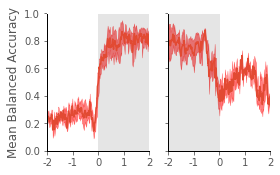

In [9]:
fig, ax = plt.subplots(1,2, figsize = (4,2.5), sharey = True)
plt.rcParams['svg.fonttype'] = 'none'

ax[0].plot(startaccuracymean)
ax[1].plot(stopaccuracymean)

ax[0].fill_between(np.arange(len(startaccuracysem)), startaccuracymean-startaccuracysem, startaccuracymean+startaccuracysem, color = 'red', alpha = 0.5)
ax[1].fill_between(np.arange(len(stopaccuracysem)), stopaccuracymean-stopaccuracysem, stopaccuracymean+stopaccuracysem, color = 'red', alpha = 0.5)

#ax[0].vlines(150, 0, 1, linestyle = '--', alpha = 0.5)
#ax[1].vlines(150, 0,1, linestyle = '--', alpha = 0.5)

ax[0].set_xlim(30, 270)
ax[0].set_xticks((30, 90, 150, 210, 270))

ax[1].set_xlim(30, 270)
ax[1].set_xticks((30,90,150,210,270))

ax[0].set_xticklabels((-2, -1, 0, 1, 2))
ax[1].set_xticklabels((-2, -1, 0, 1, 2))
ax[0].axvspan(150, 300, color = 'k', alpha = 0.1)
ax[1].axvspan(0, 150, color = 'k', alpha = 0.1)

ax[0].grid(False)
ax[1].grid(False)
ax[0].set_facecolor('white')
ax[0].spines['left'].set_color('k')
ax[0].spines['bottom'].set_color('k')
ax[1].set_facecolor('white')
ax[1].spines['left'].set_color('k')
ax[1].spines['bottom'].set_color('k')

ax[0].set_ylim(0,1)

ax[0].set_ylabel('Mean Balanced Accuracy')

plt.tight_layout()
plt.savefig('F:/Figure3_New/LDAbeforeandafter.svg', format = 'svg', dpi = 500, transparent = True)

In [10]:
beforepresentationmean = np.mean(np.hstack((np.mean(A6balancedaccuracystart[:150]), np.mean(A8balancedaccuracystart[:150]), np.mean(A10balancedaccuracystart[:150]), np.mean(A11balancedaccuracystart[:150]))))

beforepresentationsem = stats.sem(np.hstack((np.mean(A6balancedaccuracystart[:150]), np.mean(A8balancedaccuracystart[:150]), np.mean(A10balancedaccuracystart[:150]), np.mean(A11balancedaccuracystart[:150]))))

afterpresentationmean = np.mean(np.hstack((np.mean(A6balancedaccuracystart[150:]), np.mean(A8balancedaccuracystart[150:]), np.mean(A10balancedaccuracystart[150:]), np.mean(A11balancedaccuracystart[150:]))))

afterpresentationsem = stats.sem(np.hstack((np.mean(A6balancedaccuracystart[150:]), np.mean(A8balancedaccuracystart[150:]), np.mean(A10balancedaccuracystart[150:]), np.mean(A11balancedaccuracystart[150:]))))

beforeremovalmean = np.mean(np.hstack((np.mean(A6balancedaccuracystop[:150]), np.mean(A8balancedaccuracystop[:150]), np.mean(A10balancedaccuracystop[:150]), np.mean(A11balancedaccuracystop[:150]))))

beforeremovalsem = stats.sem(np.hstack((np.mean(A6balancedaccuracystop[:150]), np.mean(A8balancedaccuracystop[:150]), np.mean(A10balancedaccuracystop[:150]), np.mean(A11balancedaccuracystop[:150]))))

afterremovalmean = np.mean(np.hstack((np.mean(A6balancedaccuracystop[150:]), np.mean(A8balancedaccuracystop[150:]), np.mean(A10balancedaccuracystop[150:]), np.mean(A11balancedaccuracystop[150:]))))

afterremovalsem = stats.sem(np.hstack((np.mean(A6balancedaccuracystop[150:]), np.mean(A8balancedaccuracystop[150:]), np.mean(A10balancedaccuracystop[150:]), np.mean(A11balancedaccuracystop[150:]))))

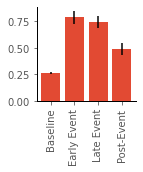

In [16]:
fig, ax = plt.subplots(1, figsize = (2,2.5))
plt.rcParams['svg.fonttype'] = 'none'

ax.bar((0,1,2,3), (beforepresentationmean, afterpresentationmean, beforeremovalmean, afterremovalmean), yerr = (beforepresentationsem, afterpresentationsem, beforeremovalsem, afterremovalsem))

ax.grid(False)
ax.set_facecolor('white')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')

ax.set_xticks((0,1, 2,3))
ax.set_xticklabels(('Baseline', 'Early Event', 'Late Event', 'Post-Event'), rotation = 90)


plt.tight_layout()

plt.savefig('F:/Figure3_New/LDAbeforeandafter_quantification.svg', format = 'svg', dpi = 500, transparent = True)

In [87]:
beforepresentationsem

0.011417864987970122